# CURLF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_curlf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/curlf.csv')
df_curlf['Date'] = pd.to_datetime(df_curlf['Date'])
df_curlf = df_curlf.set_index('Date')
df_curlf = df_curlf.rename(columns={'Open':'curlf_Open', 'High':'curlf_High', 'Low':'curlf_Low', 'Close':'curlf_Close', 'Volume':'curlf_Volume'})
df_curlf = df_curlf.drop('Adj Close', axis=1)
df_curlf['curlf_prev_close'] = df_curlf['curlf_Close'].shift(1)
df_curlf['curlf_next_close'] = df_curlf['curlf_Close'].shift(-1)
df_curlf['curlf_diff'] = df_curlf['curlf_Close'].diff()
df_curlf['curlf_%change'] = df_curlf['curlf_Close'].pct_change()
df_curlf['curlf_5day_avg_close'] = df_curlf['curlf_Close'].rolling(5).mean()
df_curlf['curlf_5day_avg_diff'] = df_curlf['curlf_diff'].rolling(5).mean()
df_curlf['curlf_10day_avg_close'] = df_curlf['curlf_Close'].rolling(10).mean()
df_curlf['curlf_10day_avg_diff'] = df_curlf['curlf_diff'].rolling(10).mean()

In [4]:
df_curlf

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260               NaN      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff  
Date                              
2018-10-29                   NaN  
2018-10-30                   NaN  
2018-10-31                   NaN  
2018-11-01                   NaN  
2018-11-02                   NaN  
...                          ...  
2022-05-17               -0.0030  
2022-05-18               -0.0130  
2022-05-19                0.0330  
2022-05-20                0.0308  
2022-05-23                0.0440  

[898 rows x 13 columns]

In [5]:
cut = df_curlf.index.min()
cut

Timestamp('2018-10-29 00:00:00')

Text(0.5, 0, 'CURLF Close')

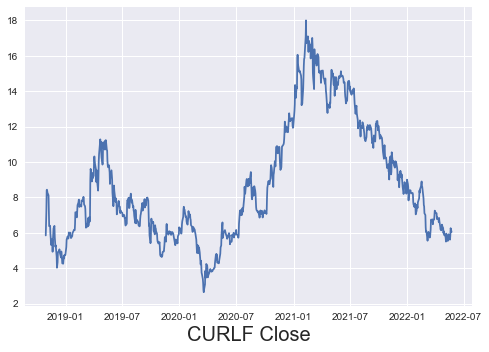

In [6]:
plt.plot(df_curlf['curlf_Close'])
plt.xlabel('CURLF Close', fontsize=20)

## CURLF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_curlf, df_dow, on='Date', how='left')
df0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260               NaN      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                   NaN   24818.98   25040.58  24122.23    24442.92   
2018-10-30                   NaN   24482.04   24906.68  24415.69    24874.64   
2018-10-31                   NaN   25008.82   25336.55  25008.82    25115.76   
2018-11-01                   NaN   25142.08   25396.47  25108.11    25380.74   
2018-11-02                   NaN   25443.60   25578.98  25078.72    25270.83   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0030   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0130   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.0330   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.0308   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                  True      False      False     False       False   
2018-10-30                  True      False      False     False       False   
2018-10-31                  True      False      False     False       False   
2018-11-01                  True      False      False     False       False   
2018-11-02                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                   0.0   24818.98   25040.58  24122.23    24442.92   
2018-10-30                   0.0   24482.04   24906.68  24415.69    24874.64   
2018-10-31                   0.0   25008.82   25336.55  25008.82    25115.76   
2018-11-01                   0.0   25142.08   25396.47  25108.11    25380.74   
2018-11-02                   0.0   25443.60   25578.98  25078.72    25270.83   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-10-29  443753880.0         24688.31         24874.64    -245.39   
2018-10-30  470064660.0         24442.92         25115.76     431.72   
2018-10-31  448881152.0         24874.64         25380.74     241.12   
2018-11-01  384030281.0         25115.76         25270.83     264.98   
2018-11-02  429561488.0         25380.74         25461.70    -109.91   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-10-29     -0.009940            24778.126            -174.898   
2018-10-30      0.017662            24714.768             -63.358   
2018-10-31      0.009693            24821.236             106.468   
2018-11-01      0.010550            24900.474              79.238   
2018-11-02     -0.004330            25016.978             116.504   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-10-29             25153.693              -80.763  
2018-10-30             25061.315              -92.378  
2018-10-31             25002.223              -59.092  
2018-11-01             25002.352                0.129  
2018-11-02             24985.001              -17.351

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260             0.000      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                0.0000   24818.98   25040.58  24122.23    24442.92   
2018-10-30                0.0000   24482.04   24906.68  24415.69    24874.64   
2018-10-31                0.0000   25008.82   25336.55  25008.82    25115.76   
2018-11-01                0.0000   25142.08   25396.47  25108.11    25380.74   
2018-11-02                0.0000   25443.60   25578.98  25078.72    25270.83   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0030   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0130   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.0330   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.0308   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   
2018-11-01     11    1  2018        4       7.577        8.50      7.364   
2018-11-02     11    2  2018        4       8.557        9.80      8.047   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   
2018-11-01                  0.0                    0.0                   0.0   
2018-11-02                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-10-29   24818.98   25040.58  24122.23    24442.92  443753880.0   
2018-10-30   24482.04   24906.68  24415.69    24874.64  470064660.0   
2018-10-31   25008.82   25336.55  25008.82    25115.76  448881152.0   
2018-11-01   25142.08   25396.47  25108.11    25380.74  384030281.0   
2018-11-02   25443.60   25578.98  25078.72    25270.83  429561488.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-10-29         24688.31         24874.64    -245.39     -0.009940   
2018-10-30         24442.92         25115.76     431.72      0.017662   
2018-10-31         24874.64         25380.74     241.12      0.009693   
2018-11-01         25115.76         25270.83     264.98      0.010550   
2018-11-02         25380.74         25461.70    -109.91     -0.004330   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-10-29            24778.126            -174.898             25153.693   
2018-10-30            24714.768             -63.358             25061.315   
2018-10-31            24821.236             106.468             25002.223   
2018-11-01            24900.474              79.238             25002.352   
2018-11-02            25016.978             116.504             24985.001   

            djix_10day_avg_diff  curlf_Open_b  curlf_High_b  curlf_Low_b  \
Date                                                                       
2018-10-29              -80.763         False         False        False   
2018-10-30              -92.378         False         False        False   
2018-10-31              -59.092         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(897, 56)

In [18]:
n = int(len(df0) * 0.9)
n

807

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

807
90


In [21]:
X_train0 = train0.drop('curlf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-10-29                    0.0                   0.0   24818.98   25040.58   
2018-10-30                    0.0                   0.0   24482.04   24906.68   
2018-10-31                    0.0                   0.0   25008.82   25336.55   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-10-29  24122.23    24442.92  443753880.0         24688.31   
2018-10-30  24415.69    24874.64  470064660.0         24442.92   
2018-10-31  25008.82    25115.76  448881152.0         24874.64   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-10-29         24874.64    -245.39     -0.009940            24778.126   
2018-10-30         25115.76     431.72      0.017662            24714.768   
2018-10-31         25380.74     241.12      0.009693            24821.236   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-10-29            -174.898             25153.693              -80.763   
2018-10-30             -63.358             25061.315              -92.378   
2018-10-31             106.468             25002.223              -59.092   

            curlf_Open_b  curlf_High_b  curlf_Low_b  curlf_Close_b  \
Date                                                                 
2018-10-29         False         False        False          False   
2018-10-30         False         False        False          False   
2018-10-31         False         False        False          False   

            curlf_Volume_b  curlf_prev_close_b  curlf_next_close_b  \
Date                                                                 
2018-10-29           False                True               False   
2018-10-30           False               False               False   
2018-10-31           False               False               False   

            curlf_diff_b  curlf_%change_b  curlf_5day_avg_close_b  \
Date                                                                
2018-10-29          True             True                    True   
2018-10-30         False            False                    True   
2018-10-31         False            False                    True   

            curlf_5day_avg_diff_b  curlf_10day_avg_close_b  \
Date                                                         
2018-10-29                   True                     True   
2018-10-30                   True                     True   
2018-10-31                   True                     True   

            curlf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(807, 55)

In [23]:
y_train0 = train0['curlf_next_close']
y_train0.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('curlf_next_close', axis=1)
y_test0 = test0['curlf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2022-01-12      1   12  2022        1        8.40        8.98      8.009   
2022-01-13      1   13  2022        1        8.10        8.40      8.090   
2022-01-14      1   14  2022        1        8.22        8.27      8.000   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2022-01-12         8.31        457300             8.403      -0.093   
2022-01-13         8.22        606800             8.310      -0.090   
2022-01-14         8.23        342500             8.220       0.010   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2022-01-12      -0.011067                8.3106               0.0962   
2022-01-13      -0.010830                8.3346               0.0240   
2022-01-14       0.001217                8.3006              -0.0340   

            curlf_10day_avg_close  curlf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-01-12                 8.4375                0.0100   36336.16   36453.49   
2022-01-13                 8.3922               -0.0453   36312.49   36513.88   
2022-01-14                 8.3152               -0.0770   35996.43   35996.43   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-01-12  36168.15    36290.32  361798146.0         36252.02   
2022-01-13  36044.22    36113.62  395636110.0         36290.32   
2022-01-14  35641.49    35911.81  439707231.0         36113.62   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-01-12         36113.62      38.30      0.001056            36215.868   
2022-01-13         35911.81    -176.70     -0.004869            36191.298   
2022-01-14         35368.47    -201.81     -0.005588            36127.328   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-01-12             -23.358             36360.754              -19.831   
2022-01-13             -24.570             36332.308              -28.446   
2022-01-14             -63.970             36289.659              -42.649   

            curlf_Open_b  curlf_High_b  curlf_Low_b  curlf_Close_b  \
Date                                                                 
2022-01-12         False         False        False          False   
2022-01-13         False         False        False          False   
2022-01-14         False         False        False          False   

            curlf_Volume_b  curlf_prev_close_b  curlf_next_close_b  \
Date                                                                 
2022-01-12           False               False               False   
2022-01-13           False               False               False   
2022-01-14           False               False               False   

            curlf_diff_b  curlf_%change_b  curlf_5day_avg_close_b  \
Date                                                                
2022-01-12         False            False                   False   
2022-01-13         False            False                   False   
2022-01-14         False            False                   False   

            curlf_5day_avg_diff_b  curlf_10day_avg_close_b  \
Date                                                         
2022-01-12                  False                    False   
2022-01-13                  False                    False   
2022-01-14                  False                    False   

            curlf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(90, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([8.29003984, 8.22963024, 8.1666737 , 8.22321245, 8.08693451])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.251400371793152


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.18748363082252273


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['curlf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['curlf_next_close'])

In [35]:
y_test0['curlf_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               5.957798
2022-05-17              5.61               5.593090
2022-05-18              5.83               5.497722
2022-05-19              6.26               5.937318
2022-05-20              6.05               6.453943

In [37]:
hyper_table.append(dict(stock='curlf', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['curlf_next_close'][-1],
                        predicted_price=y_test0['curlf_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

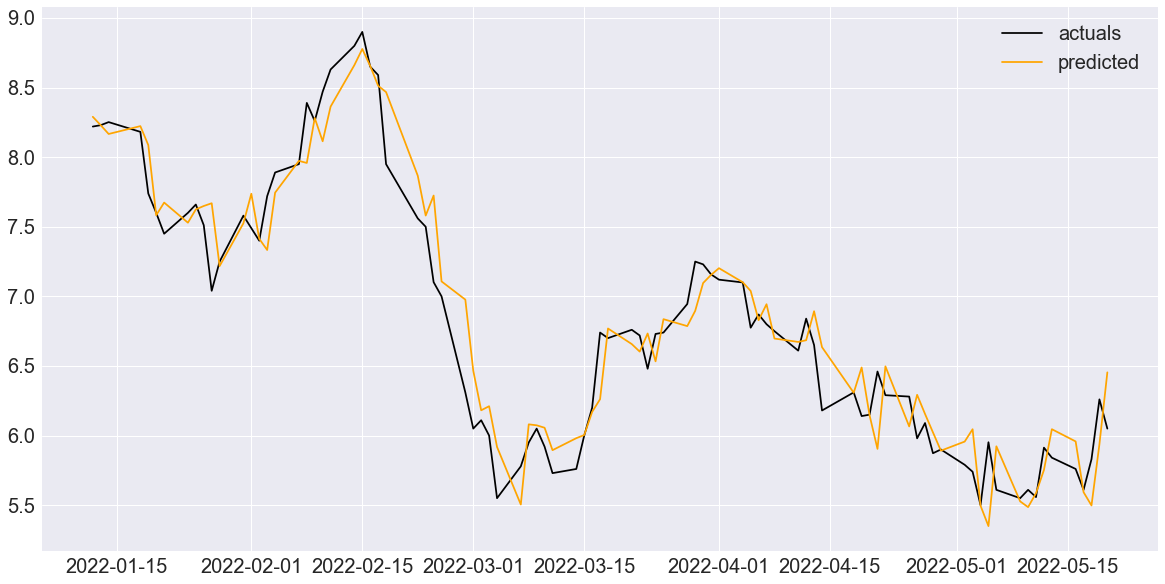

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['curlf_next_close'], color='black')
ax.plot(y_test0['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CURLF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_curlf, df_etfs, on='Date', how='left')
df1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260               NaN      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   NaN  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   NaN  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   NaN  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   NaN  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   NaN  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0030   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0130   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.0330   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0308   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            curlf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-10-29                  True    False    False   False     False   
2018-10-30                  True    False    False   False     False   
2018-10-31                  True    False    False   False     False   
2018-11-01                  True    False    False   False     False   
2018-11-02                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   0.0  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   0.0  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   0.0  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   0.0  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   0.0  32.049999  32.380001  31.570000  32.299999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-10-29    1206200      31.990000      29.740000 -2.770001   -0.086590   
2018-10-30     852000      29.219999      31.020000  0.520001    0.017796   
2018-10-31     865400      29.740000      31.809999  1.280000    0.043040   
2018-11-01     603800      31.020000      32.299999  0.789999    0.025467   
2018-11-02     606200      31.809999      33.419998  0.490000    0.015404   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-10-29          31.583999         -0.954001              34.942   
2018-10-30          30.930000         -0.654000              33.826   
2018-10-31          30.848000         -0.082000              32.957   
2018-11-01          30.756000         -0.092000              32.198   
2018-11-02          30.817999          0.062000              31.678   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-10-29             -1.326        0.0        0.0       0.0         0.0   
2018-10-30             -1.116        0.0        0.0       0.0         0.0   
2018-10-31             -0.869        0.0        0.0       0.0         0.0   
2018-11-01             -0.759        0.0        0.0       0.0         0.0   
2018-11-02             -0.520        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-10-29          0.0              0.0              0.0        0.0   
2018-10-30          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260             0.000      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                0.0000  32.380001  32.813999  28.610001  29.219999   
2018-10-30                0.0000  28.309999  30.270000  28.211000  29.740000   
2018-10-31                0.0000  30.440001  31.379999  30.028999  31.020000   
2018-11-01                0.0000  31.440001  31.999001  30.812000  31.809999   
2018-11-02                0.0000  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0030   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0130   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.0330   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0308   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   
2018-11-01     11    1  2018        4       7.577        8.50      7.364   
2018-11-02     11    2  2018        4       8.557        9.80      8.047   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       5.780        6.00      5.750   
2022-05-18      5   18  2022        2       5.820        5.82      5.490   
2022-05-19      5   19  2022        2       5.590        5.90      5.471   
2022-05-20      5   20  2022        2       5.830        6.26      5.590   
2022-05-23      5   23  2022        2       6.450        6.45      6.010   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   
...                 ...           ...               ...               ...   
2022-05-17        5.760        353000             5.841             5.610   
2022-05-18        5.610        265900             5.760             5.830   
2022-05-19        5.830        373100             5.610             6.260   
2022-05-20        6.260        349700             5.830             6.050   
2022-05-23        6.050        172800             6.260             0.000   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   
...                ...            ...                   ...   
2022-05-17      -0.081      -0.013867                5.7364   
2022-05-18      -0.150      -0.026042                5.7364   
2022-05-19       0.220       0.039216                5.7908   
2022-05-20       0.430       0.073756                5.8602   
2022-05-23      -0.210      -0.033546                5.9020   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29               0.0000                 0.0000                0.0000   
2018-10-30               0.0000                 0.0000                0.0000   
2018-10-31               0.0000                 0.0000                0.0000   
2018-11-01               0.0000                 0.0000                0.0000   
2018-11-02               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17               0.0420                 5.7034               -0.0030   
2022-05-18               0.0000                 5.6904               -0.0130   
2022-05-19               0.0544                 5.7234                0.0330   
2022-05-20               0.0694                 5.7542                0.0308   
2022-05-23               0.0418                 5.7982                0.0440   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-10-29  32.380001 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

807

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

807
90


In [52]:
X_train1 = train1.drop('curlf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-10-29                    0.0                   0.0  32.380001  32.813999   
2018-10-30                    0.0                   0.0  28.309999  30.270000   
2018-10-31                    0.0                   0.0  30.440001  31.379999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-10-29  28.610001  29.219999    1206200      31.990000      29.740000   
2018-10-30  28.211000  29.740000     852000      29.219999      31.020000   
2018-10-31  30.028999  31.020000     865400      29.740000      31.809999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-10-29 -2.770001   -0.086590          31.583999         -0.954001   
2018-10-30  0.520001    0.017796          30.930000         -0.654000   
2018-10-31  1.280000    0.043040          30.848000         -0.082000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-10-29              34.942             -1.326        0.0        0.0   
2018-10-30              33.826             -1.116        0.0        0.0   
2018-10-31              32.957             -0.869        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-10-29       0.0         0.0          0.0              0.0   
2018-10-30       0.0         0.0          0.0              0.0   
2018-10-31       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-10-29              0.0        0.0           0.0                  0.0   
2018-10-30              0.0        0.0           0.0                  0.0   
2018-10-31              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-10-29                 0.0                   0.0                  0.0   
2018-10-30                 0.0                   0.0                  0.0   
2018-10-31                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-10-29        0.0        0.0       0.0         0.0          0.0   
2018-10-30        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(807, 159)

In [54]:
y_train1 = train1['curlf_next_close']
y_train1.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('curlf_next_close', axis=1)
y_test1 = test1['curlf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2022-01-12      1   12  2022        1        8.40        8.98      8.009   
2022-01-13      1   13  2022        1        8.10        8.40      8.090   
2022-01-14      1   14  2022        1        8.22        8.27      8.000   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2022-01-12         8.31        457300             8.403      -0.093   
2022-01-13         8.22        606800             8.310      -0.090   
2022-01-14         8.23        342500             8.220       0.010   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2022-01-12      -0.011067                8.3106               0.0962   
2022-01-13      -0.010830                8.3346               0.0240   
2022-01-14       0.001217                8.3006              -0.0340   

            curlf_10day_avg_close  curlf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-12                 8.4375                0.0100    11.35   11.470   
2022-01-13                 8.3922               -0.0453    11.13   11.180   
2022-01-14                 8.3152               -0.0770    10.83   10.905   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-12   11.09     11.16     894000          11.31          10.85   
2022-01-13   10.84     10.85     806300          11.16          10.85   
2022-01-14   10.65     10.85     865400          10.85          10.44   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-12    -0.15   -0.013263             11.018             0.078   
2022-01-13    -0.31   -0.027778             11.052             0.034   
2022-01-14     0.00    0.000000             11.048            -0.004   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-12              11.087              0.011  24.879999  25.228001   
2022-01-13              11.051             -0.036  24.950001  24.950001   
2022-01-14              11.028             -0.023  24.219999  24.389999   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-12  24.280001   24.790001    1086600.0        24.700001   
2022-01-13  24.299999   24.559999     579400.0        24.790001   
2022-01-14  23.820000   24.340000     710800.0        24.559999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-12        24.559999   0.090000      0.003644               24.450   
2022-01-13        24.340000  -0.230002     -0.009278               24.586   
2022-01-14        24.030001  -0.219999     -0.008958               24.564   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-12               0.280                24.727               -0.025   
2022-01-13               0.136                24.636               -0.091   
2022-01-14              -0.022                24.511               -0.125   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-12      12.29     12.604     12.15       12.15      63600.0   
2022-01-13      12.17     12.300     11.90       11.93      80500.0   
2022-01-14      11.77     12.000 

In [58]:
X_test1.shape

(90, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([8.26562428, 8.20238005, 8.21395222, 8.0180722 , 7.81602841])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.1822025459185455


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.14227309074276945


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['curlf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['curlf_next_close'])

In [65]:
y_test1['curlf_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               5.774439
2022-05-17              5.61               5.491541
2022-05-18              5.83               5.682922
2022-05-19              6.26               6.075672
2022-05-20              6.05               6.231867

In [67]:
hyper_table.append(dict(stock='curlf', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['curlf_next_close'][-1],
                        predicted_price=y_test1['curlf_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

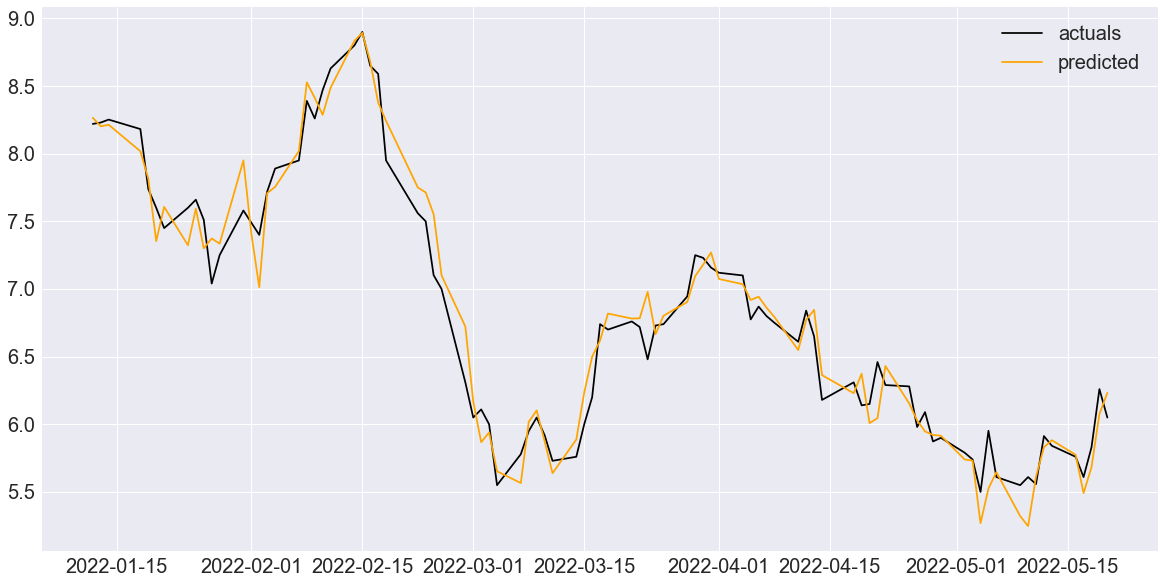

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['curlf_next_close'], color='black')
ax.plot(y_test1['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CURLF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_curlf, df_etfs_dow, on='Date', how='left')
df2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260               NaN      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   NaN  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   NaN  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   NaN  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   NaN  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   NaN  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0030   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0130   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.0330   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0308   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            curlf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-10-29                  True    False    False   False     False   
2018-10-30                  True    False    False   False     False   
2018-10-31                  True    False    False   False     False   
2018-11-01                  True    False    False   False     False   
2018-11-02                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   0.0  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   0.0  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   0.0  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   0.0  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   0.0  32.049999  32.380001  31.570000  32.299999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-10-29    1206200      31.990000      29.740000 -2.770001   -0.086590   
2018-10-30     852000      29.219999      31.020000  0.520001    0.017796   
2018-10-31     865400      29.740000      31.809999  1.280000    0.043040   
2018-11-01     603800      31.020000      32.299999  0.789999    0.025467   
2018-11-02     606200      31.809999      33.419998  0.490000    0.015404   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-10-29          31.583999         -0.954001              34.942   
2018-10-30          30.930000         -0.654000              33.826   
2018-10-31          30.848000         -0.082000              32.957   
2018-11-01          30.756000         -0.092000              32.198   
2018-11-02          30.817999          0.062000              31.678   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-10-29             -1.326        0.0        0.0       0.0         0.0   
2018-10-30             -1.116        0.0        0.0       0.0         0.0   
2018-10-31             -0.869        0.0        0.0       0.0         0.0   
2018-11-01             -0.759        0.0        0.0       0.0         0.0   
2018-11-02             -0.520        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-10-29          0.0              0.0              0.0        0.0   
2018-10-30          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-17       5.780        6.00      5.750        5.760        353000   
2022-05-18       5.820        5.82      5.490        5.610        265900   
2022-05-19       5.590        5.90      5.471        5.830        373100   
2022-05-20       5.830        6.26      5.590        6.260        349700   
2022-05-23       6.450        6.45      6.010        6.050        172800   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-17             5.841             5.610      -0.081      -0.013867   
2022-05-18             5.760             5.830      -0.150      -0.026042   
2022-05-19             5.610             6.260       0.220       0.039216   
2022-05-20             5.830             6.050       0.430       0.073756   
2022-05-23             6.260             0.000      -0.210      -0.033546   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                5.7364               0.0420                 5.7034   
2022-05-18                5.7364               0.0000                 5.6904   
2022-05-19                5.7908               0.0544                 5.7234   
2022-05-20                5.8602               0.0694                 5.7542   
2022-05-23                5.9020               0.0418                 5.7982   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                0.0000  32.380001  32.813999  28.610001  29.219999   
2018-10-30                0.0000  28.309999  30.270000  28.211000  29.740000   
2018-10-31                0.0000  30.440001  31.379999  30.028999  31.020000   
2018-11-01                0.0000  31.440001  31.999001  30.812000  31.809999   
2018-11-02                0.0000  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0030   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0130   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.0330   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0308   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   
2018-11-01     11    1  2018        4       7.577        8.50      7.364   
2018-11-02     11    2  2018        4       8.557        9.80      8.047   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       5.780        6.00      5.750   
2022-05-18      5   18  2022        2       5.820        5.82      5.490   
2022-05-19      5   19  2022        2       5.590        5.90      5.471   
2022-05-20      5   20  2022        2       5.830        6.26      5.590   
2022-05-23      5   23  2022        2       6.450        6.45      6.010   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   
...                 ...           ...               ...               ...   
2022-05-17        5.760        353000             5.841             5.610   
2022-05-18        5.610        265900             5.760             5.830   
2022-05-19        5.830        373100             5.610             6.260   
2022-05-20        6.260        349700             5.830             6.050   
2022-05-23        6.050        172800             6.260             0.000   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   
...                ...            ...                   ...   
2022-05-17      -0.081      -0.013867                5.7364   
2022-05-18      -0.150      -0.026042                5.7364   
2022-05-19       0.220       0.039216                5.7908   
2022-05-20       0.430       0.073756                5.8602   
2022-05-23      -0.210      -0.033546                5.9020   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29               0.0000                 0.0000                0.0000   
2018-10-30               0.0000                 0.0000                0.0000   
2018-10-31               0.0000                 0.0000                0.0000   
2018-11-01               0.0000                 0.0000                0.0000   
2018-11-02               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17               0.0420                 5.7034               -0.0030   
2022-05-18               0.0000                 5.6904               -0.0130   
2022-05-19               0.0544                 5.7234                0.0330   
2022-05-20               0.0694                 5.7542                0.0308   
2022-05-23               0.0418                 5.7982                0.0440   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-10-29  32.380001 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

807

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

807
90


In [82]:
X_train2 = train2.drop('curlf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-10-29                    0.0                   0.0  32.380001  32.813999   
2018-10-30                    0.0                   0.0  28.309999  30.270000   
2018-10-31                    0.0                   0.0  30.440001  31.379999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-10-29  28.610001  29.219999    1206200      31.990000      29.740000   
2018-10-30  28.211000  29.740000     852000      29.219999      31.020000   
2018-10-31  30.028999  31.020000     865400      29.740000      31.809999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-10-29 -2.770001   -0.086590          31.583999         -0.954001   
2018-10-30  0.520001    0.017796          30.930000         -0.654000   
2018-10-31  1.280000    0.043040          30.848000         -0.082000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-10-29              34.942             -1.326        0.0        0.0   
2018-10-30              33.826             -1.116        0.0        0.0   
2018-10-31              32.957             -0.869        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-10-29       0.0         0.0          0.0              0.0   
2018-10-30       0.0         0.0          0.0              0.0   
2018-10-31       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-10-29              0.0        0.0           0.0                  0.0   
2018-10-30              0.0        0.0           0.0                  0.0   
2018-10-31              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-10-29                 0.0                   0.0                  0.0   
2018-10-30                 0.0                   0.0                  0.0   
2018-10-31                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-10-29        0.0        0.0       0.0         0.0          0.0   
2018-10-30        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(807, 185)

In [84]:
y_train2 = train2['curlf_next_close']
y_train2.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('curlf_next_close', axis=1)
y_test2 = test2['curlf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2022-01-12      1   12  2022        1        8.40        8.98      8.009   
2022-01-13      1   13  2022        1        8.10        8.40      8.090   
2022-01-14      1   14  2022        1        8.22        8.27      8.000   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2022-01-12         8.31        457300             8.403      -0.093   
2022-01-13         8.22        606800             8.310      -0.090   
2022-01-14         8.23        342500             8.220       0.010   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2022-01-12      -0.011067                8.3106               0.0962   
2022-01-13      -0.010830                8.3346               0.0240   
2022-01-14       0.001217                8.3006              -0.0340   

            curlf_10day_avg_close  curlf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-12                 8.4375                0.0100    11.35   11.470   
2022-01-13                 8.3922               -0.0453    11.13   11.180   
2022-01-14                 8.3152               -0.0770    10.83   10.905   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-12   11.09     11.16     894000          11.31          10.85   
2022-01-13   10.84     10.85     806300          11.16          10.85   
2022-01-14   10.65     10.85     865400          10.85          10.44   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-12    -0.15   -0.013263             11.018             0.078   
2022-01-13    -0.31   -0.027778             11.052             0.034   
2022-01-14     0.00    0.000000             11.048            -0.004   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-12              11.087              0.011  24.879999  25.228001   
2022-01-13              11.051             -0.036  24.950001  24.950001   
2022-01-14              11.028             -0.023  24.219999  24.389999   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-12  24.280001   24.790001    1086600.0        24.700001   
2022-01-13  24.299999   24.559999     579400.0        24.790001   
2022-01-14  23.820000   24.340000     710800.0        24.559999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-12        24.559999   0.090000      0.003644               24.450   
2022-01-13        24.340000  -0.230002     -0.009278               24.586   
2022-01-14        24.030001  -0.219999     -0.008958               24.564   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-12               0.280                24.727               -0.025   
2022-01-13               0.136                24.636               -0.091   
2022-01-14              -0.022                24.511               -0.125   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-12      12.29     12.604     12.15       12.15      63600.0   
2022-01-13      12.17     12.300     11.90       11.93      80500.0   
2022-01-14      11.77     12.000 

In [88]:
X_test2.shape

(90, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([8.22870171, 8.17886824, 8.1943494 , 7.98256105, 7.77485398])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.19352697862979365


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.14485053892779595


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['curlf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['curlf_next_close'])

In [95]:
y_test2['curlf_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               5.875408
2022-05-17              5.61               5.490476
2022-05-18              5.83               5.688974
2022-05-19              6.26               6.155674
2022-05-20              6.05               6.225648

In [97]:
hyper_table.append(dict(stock='curlf', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['curlf_next_close'][-1],
                        predicted_price=y_test2['curlf_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

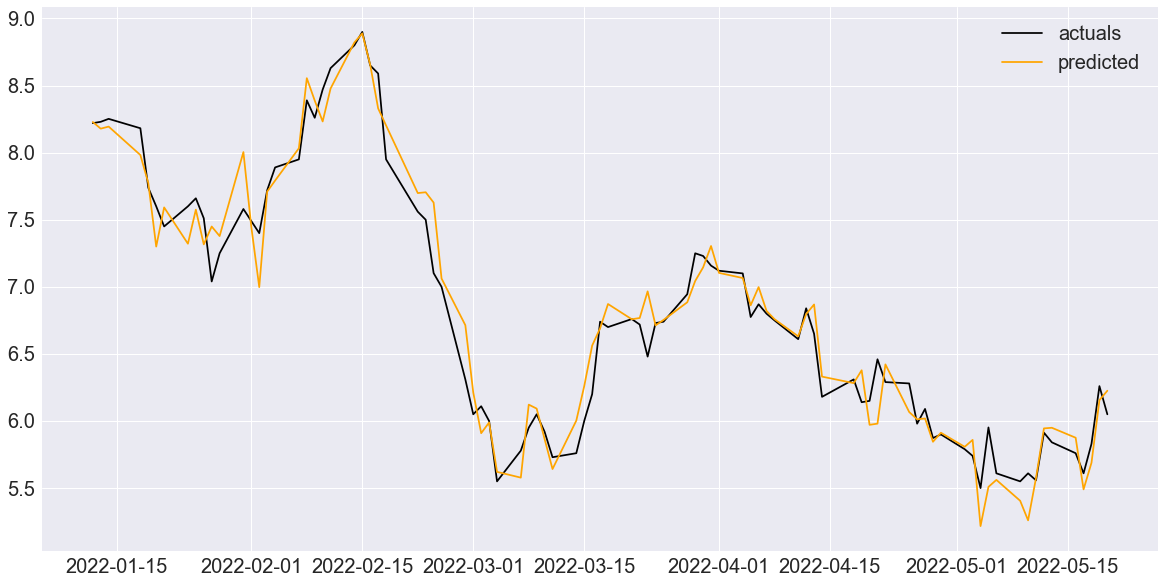

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['curlf_next_close'], color='black')
ax.plot(y_test2['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578           0.090000   
2022-05-18    -0.050934               5.700           0.122000   
2022-05-19     0.050089               5.800           0.100000   
2022-05-20    -0.059625               5.720          -0.080000   
2022-05-23    -0.059783               5.612          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382       0.000        0.00   
2018-10-30            41.202999              -1.904       0.000        0.00   
2018-10-31            39.822999              -1.380       0.000        0.00   
2018-11-01            38.634999              -1.188       0.000        0.00   
2018-11-02            37.663999              -0.971       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

807

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

807
90


In [112]:
X_train3 = train3.drop('curlf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [113]:
X_train3.shape

(807, 263)

In [114]:
y_train3 = train3['curlf_next_close']
y_train3.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('curlf_next_close', axis=1)
y_test3 = test3['curlf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-12      1   12  2022        1      9.16      9.36    8.825       8.92   
2022-01-13      1   13  2022        1      8.98      9.00    8.400       8.41   
2022-01-14      1   14  2022        1      8.38      8.46    8.085       8.40   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   
2022-01-13     6139300            8.92            8.40     -0.51    -0.057175   
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-12               8.702              0.110                8.782   
2022-01-13               8.742              0.040                8.729   
2022-01-14               8.718             -0.024                8.696   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-12               0.016        6.70       7.364      6.570   
2022-01-13              -0.053        6.77       7.156      6.536   
2022-01-14              -0.033        6.80       6.980      6.610   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-12        6.767      565500.0             6.640             6.880   
2022-01-13        6.880      548600.0             6.767             6.910   
2022-01-14        6.910      418000.0             6.880             6.818   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-12       0.127       0.019127                6.5734   
2022-01-13       0.113       0.016699                6.6854   
2022-01-14       0.030       0.004360                6.7614   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-12               0.1394                 6.5567                0.0157   
2022-01-13               0.1120                 6.5787                0.0220   
2022-01-14               0.0760                 6.6027                0.0240   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   
2022-01-13       4.03       4.06     3.880        3.90    1884100.0   
2022-01-14       3.88       3.94     3.785        3.93    1915200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-12             4.06             3.90      -0.03     -0.007389   
2022-01-13             4.03             3.93      -0.13     -0.032258   
2022-01-14             3.90             3.68       0.03      0.007692   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-12                3.952               0.034                 3.986   
2022-01-13                3.970               0.018                 3.975   
2022-01-14                3.976               0.006                 3.976   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-12                0.018        8.40        8.98      8.009   
2022-01-13               -0.011        8.10        8.40      8

In [118]:
X_test3.shape

(90, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([8.18405318, 8.35997898, 8.34497617, 8.33105581, 7.78361123])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.2125450095767743


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.16047453947044438


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['curlf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['curlf_next_close'])

In [125]:
y_test3['curlf_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               5.730679
2022-05-17              5.61               5.654222
2022-05-18              5.83               5.776984
2022-05-19              6.26               6.065607
2022-05-20              6.05               6.119240

In [127]:
hyper_table.append(dict(stock='curlf', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['curlf_next_close'][-1],
                        predicted_price=y_test3['curlf_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

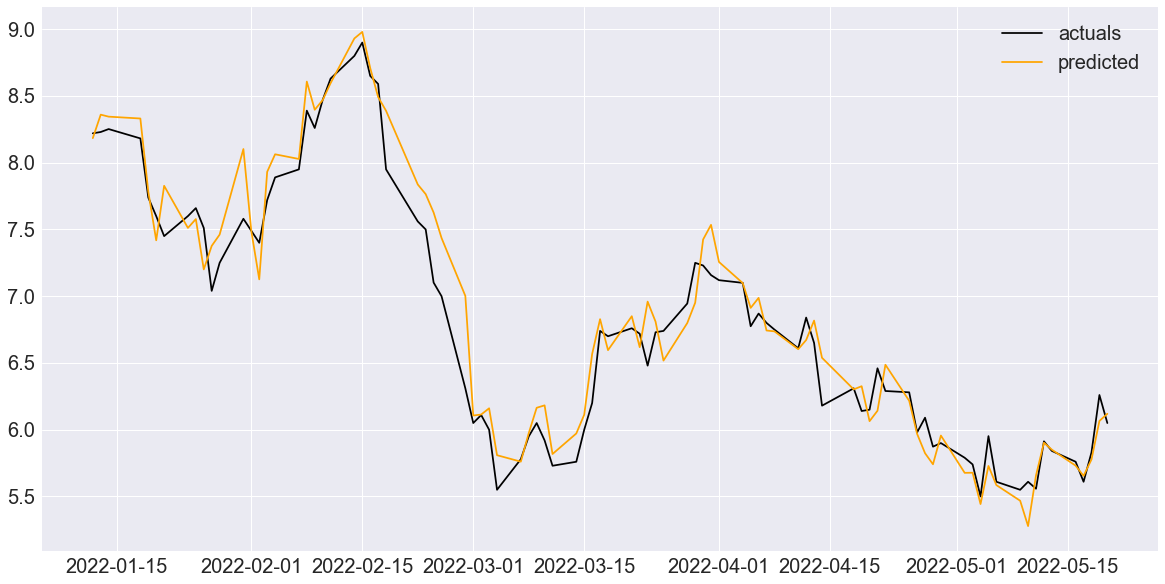

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['curlf_next_close'], color='black')
ax.plot(y_test3['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578           0.090000   
2022-05-18    -0.050934               5.700           0.122000   
2022-05-19     0.050089               5.800           0.100000   
2022-05-20    -0.059625               5.720          -0.080000   
2022-05-23    -0.059783               5.612          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382       0.000        0.00   
2018-10-30            41.202999              -1.904       0.000        0.00   
2018-10-31            39.822999              -1.380       0.000        0.00   
2018-11-01            38.634999              -1.188       0.000        0.00   
2018-11-02            37.663999              -0.971       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

807

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

807
90


In [142]:
X_train4 = train4.drop('curlf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [143]:
X_train4.shape

(807, 289)

In [144]:
y_train4 = train4['curlf_next_close']
y_train4.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('curlf_next_close', axis=1)
y_test4 = test4['curlf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-12      1   12  2022        1      9.16      9.36    8.825       8.92   
2022-01-13      1   13  2022        1      8.98      9.00    8.400       8.41   
2022-01-14      1   14  2022        1      8.38      8.46    8.085       8.40   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   
2022-01-13     6139300            8.92            8.40     -0.51    -0.057175   
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-12               8.702              0.110                8.782   
2022-01-13               8.742              0.040                8.729   
2022-01-14               8.718             -0.024                8.696   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-12               0.016        6.70       7.364      6.570   
2022-01-13              -0.053        6.77       7.156      6.536   
2022-01-14              -0.033        6.80       6.980      6.610   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-12        6.767      565500.0             6.640             6.880   
2022-01-13        6.880      548600.0             6.767             6.910   
2022-01-14        6.910      418000.0             6.880             6.818   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-12       0.127       0.019127                6.5734   
2022-01-13       0.113       0.016699                6.6854   
2022-01-14       0.030       0.004360                6.7614   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-12               0.1394                 6.5567                0.0157   
2022-01-13               0.1120                 6.5787                0.0220   
2022-01-14               0.0760                 6.6027                0.0240   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   
2022-01-13       4.03       4.06     3.880        3.90    1884100.0   
2022-01-14       3.88       3.94     3.785        3.93    1915200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-12             4.06             3.90      -0.03     -0.007389   
2022-01-13             4.03             3.93      -0.13     -0.032258   
2022-01-14             3.90             3.68       0.03      0.007692   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-12                3.952               0.034                 3.986   
2022-01-13                3.970               0.018                 3.975   
2022-01-14                3.976               0.006                 3.976   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-12                0.018        8.40        8.98      8.009   
2022-01-13               -0.011        8.10        8.40      8

In [148]:
X_test4.shape

(90, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([8.19263694, 8.34719463, 8.374916  , 8.31185061, 7.77905239])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.21924627882690179


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.1652272453194194


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['curlf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['curlf_next_close'])

In [155]:
y_test4['curlf_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               5.807491
2022-05-17              5.61               5.762531
2022-05-18              5.83               5.752514
2022-05-19              6.26               6.102257
2022-05-20              6.05               6.222514

In [157]:
hyper_table.append(dict(stock='curlf', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['curlf_next_close'][-1],
                        predicted_price=y_test4['curlf_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

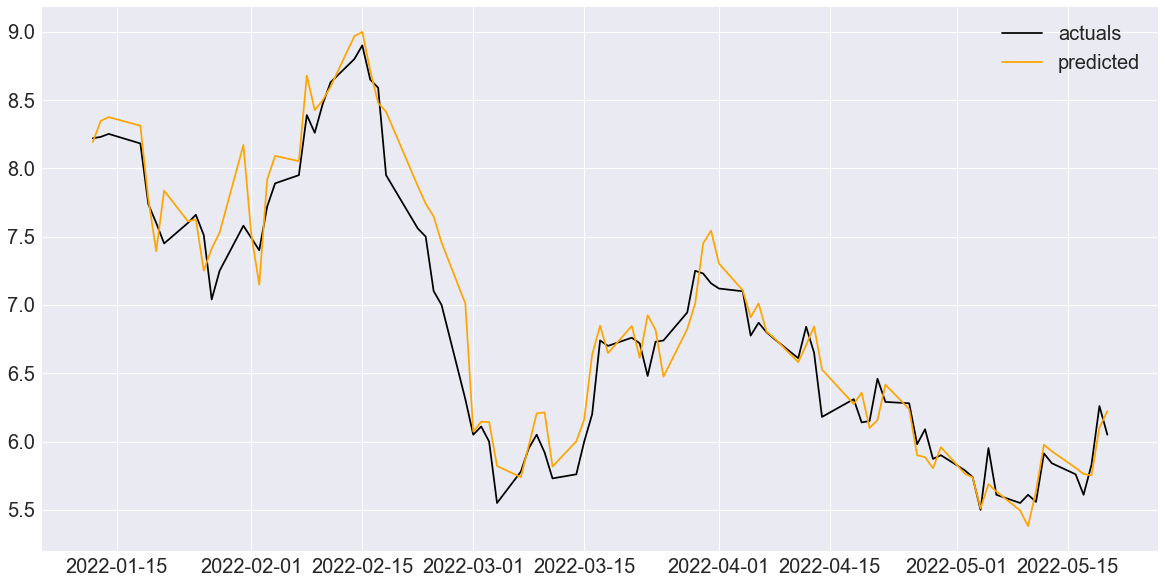

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['curlf_next_close'], color='black')
ax.plot(y_test4['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578           0.090000   
2022-05-18    -0.050934               5.700           0.122000   
2022-05-19     0.050089               5.800           0.100000   
2022-05-20    -0.059625               5.720          -0.080000   
2022-05-23    -0.059783               5.612          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382       0.000        0.00   
2018-10-30            41.202999              -1.904       0.000        0.00   
2018-10-31            39.822999              -1.380       0.000        0.00   
2018-11-01            38.634999              -1.188       0.000        0.00   
2018-11-02            37.663999              -0.971       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

807

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

807
90


In [172]:
X_train5 = train5.drop('curlf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [173]:
X_train5.shape

(807, 393)

In [174]:
y_train5 = train5['curlf_next_close']
y_train5.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('curlf_next_close', axis=1)
y_test5 = test5['curlf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-12      1   12  2022        1      9.16      9.36    8.825       8.92   
2022-01-13      1   13  2022        1      8.98      9.00    8.400       8.41   
2022-01-14      1   14  2022        1      8.38      8.46    8.085       8.40   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   
2022-01-13     6139300            8.92            8.40     -0.51    -0.057175   
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-12               8.702              0.110                8.782   
2022-01-13               8.742              0.040                8.729   
2022-01-14               8.718             -0.024                8.696   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-12               0.016        6.70       7.364      6.570   
2022-01-13              -0.053        6.77       7.156      6.536   
2022-01-14              -0.033        6.80       6.980      6.610   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-12        6.767      565500.0             6.640             6.880   
2022-01-13        6.880      548600.0             6.767             6.910   
2022-01-14        6.910      418000.0             6.880             6.818   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-12       0.127       0.019127                6.5734   
2022-01-13       0.113       0.016699                6.6854   
2022-01-14       0.030       0.004360                6.7614   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-12               0.1394                 6.5567                0.0157   
2022-01-13               0.1120                 6.5787                0.0220   
2022-01-14               0.0760                 6.6027                0.0240   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   
2022-01-13       4.03       4.06     3.880        3.90    1884100.0   
2022-01-14       3.88       3.94     3.785        3.93    1915200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-12             4.06             3.90      -0.03     -0.007389   
2022-01-13             4.03             3.93      -0.13     -0.032258   
2022-01-14             3.90             3.68       0.03      0.007692   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-12                3.952               0.034                 3.986   
2022-01-13                3.970               0.018                 3.975   
2022-01-14                3.976               0.006                 3.976   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-12                0.018        8.40        8.98      8.009   
2022-01-13               -0.011        8.10        8.40      8

In [178]:
X_test5.shape

(90, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([8.27391898, 8.39393231, 8.37560643, 8.34000569, 7.88702613])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.35223788154314345


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.3017816788906233


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['curlf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['curlf_next_close'])

In [185]:
y_test5['curlf_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               6.157534
2022-05-17              5.61               5.888236
2022-05-18              5.83               6.328690
2022-05-19              6.26               6.536885
2022-05-20              6.05               6.608465

In [187]:
hyper_table.append(dict(stock='curlf', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['curlf_next_close'][-1],
                        predicted_price=y_test5['curlf_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

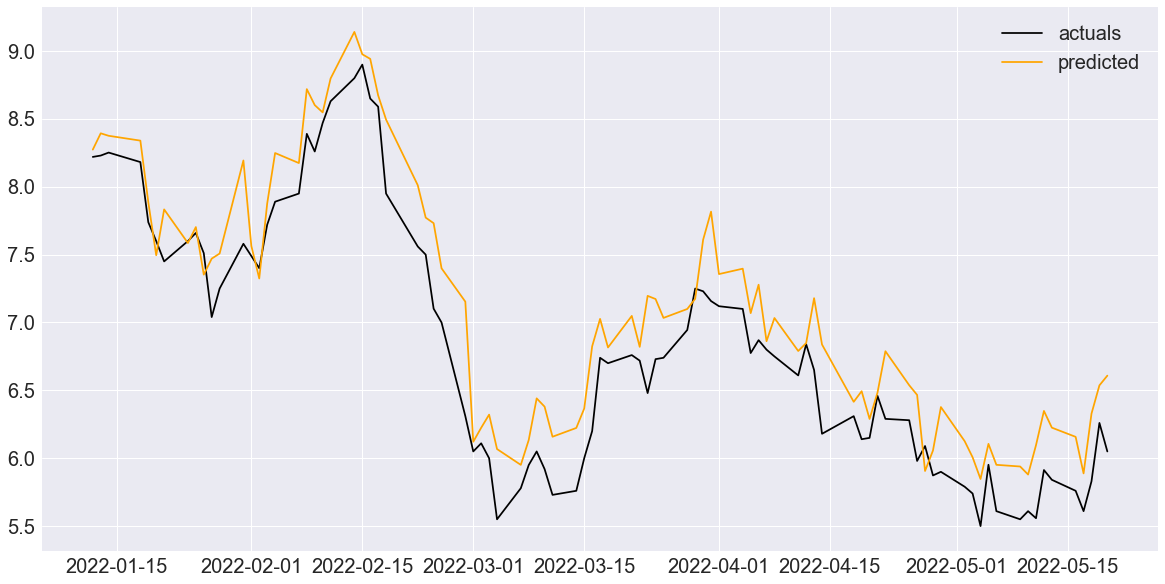

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['curlf_next_close'], color='black')
ax.plot(y_test5['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578           0.090000   
2022-05-18    -0.050934               5.700           0.122000   
2022-05-19     0.050089               5.800           0.100000   
2022-05-20    -0.059625               5.720          -0.080000   
2022-05-23    -0.059783               5.612          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382       0.000        0.00   
2018-10-30            41.202999              -1.904       0.000        0.00   
2018-10-31            39.822999              -1.380       0.000        0.00   
2018-11-01            38.634999              -1.188       0.000        0.00   
2018-11-02            37.663999              -0.971       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

807

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

807
90


In [202]:
X_train6 = train6.drop('curlf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [203]:
X_train6.shape

(807, 419)

In [204]:
y_train6 = train6['curlf_next_close']
y_train6.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2022-01-07    8.340
2022-01-10    8.403
2022-01-11    8.310
Name: curlf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('curlf_next_close', axis=1)
y_test6 = test6['curlf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-12      1   12  2022        1      9.16      9.36    8.825       8.92   
2022-01-13      1   13  2022        1      8.98      9.00    8.400       8.41   
2022-01-14      1   14  2022        1      8.38      8.46    8.085       8.40   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   
2022-01-13     6139300            8.92            8.40     -0.51    -0.057175   
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-12               8.702              0.110                8.782   
2022-01-13               8.742              0.040                8.729   
2022-01-14               8.718             -0.024                8.696   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-12               0.016        6.70       7.364      6.570   
2022-01-13              -0.053        6.77       7.156      6.536   
2022-01-14              -0.033        6.80       6.980      6.610   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-12        6.767      565500.0             6.640             6.880   
2022-01-13        6.880      548600.0             6.767             6.910   
2022-01-14        6.910      418000.0             6.880             6.818   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-12       0.127       0.019127                6.5734   
2022-01-13       0.113       0.016699                6.6854   
2022-01-14       0.030       0.004360                6.7614   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-12               0.1394                 6.5567                0.0157   
2022-01-13               0.1120                 6.5787                0.0220   
2022-01-14               0.0760                 6.6027                0.0240   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   
2022-01-13       4.03       4.06     3.880        3.90    1884100.0   
2022-01-14       3.88       3.94     3.785        3.93    1915200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-12             4.06             3.90      -0.03     -0.007389   
2022-01-13             4.03             3.93      -0.13     -0.032258   
2022-01-14             3.90             3.68       0.03      0.007692   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-12                3.952               0.034                 3.986   
2022-01-13                3.970               0.018                 3.975   
2022-01-14                3.976               0.006                 3.976   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-12                0.018        8.40        8.98      8.009   
2022-01-13               -0.011        8.10        8.40      8

In [208]:
X_test6.shape

(90, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    5.83
2022-05-19    6.26
2022-05-20    6.05
Name: curlf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([8.19678237, 8.34104547, 8.31686983, 8.25927336, 7.84977622])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.3183862650425093


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.2641916646040974


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['curlf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['curlf_next_close'])

In [215]:
y_test6['curlf_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-16              5.76               6.164065
2022-05-17              5.61               5.862480
2022-05-18              5.83               6.260253
2022-05-19              6.26               6.521463
2022-05-20              6.05               6.558624

In [217]:
hyper_table.append(dict(stock='curlf', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['curlf_next_close'][-1],
                        predicted_price=y_test6['curlf_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

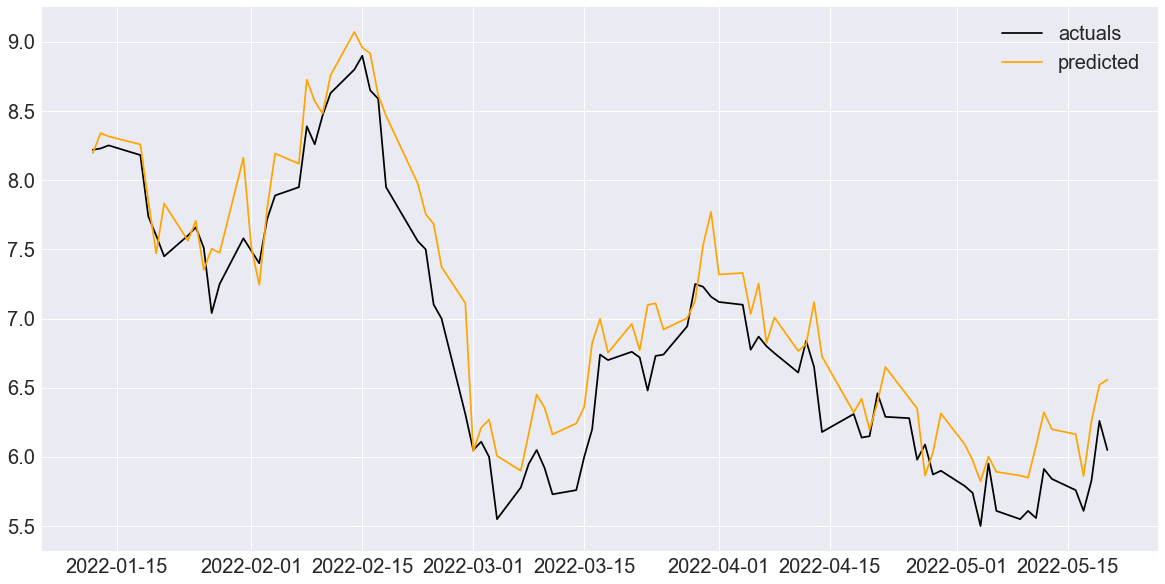

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['curlf_next_close'], color='black')
ax.plot(y_test6['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1  curlf        1+ETFs  LinearRegression()  0.182203  0.142273          6.05   
2  curlf    1+ETFs+Dow  LinearRegression()  0.193527  0.144851          6.05   
3  curlf    All stocks  LinearRegression()  0.212545  0.160475          6.05   
4  curlf       All+Dow  LinearRegression()  0.219246  0.165227          6.05   
0  curlf         1+Dow  LinearRegression()  0.251400  0.187484          6.05   
6  curlf  All+ETFs+Dow  LinearRegression()  0.318386  0.264192          6.05   
5  curlf      All+ETFs  LinearRegression()  0.352238  0.301782          6.05   

   predicted_price  rows  train_rows  test_rows  columns  
1         6.231867   897         807         90      160  
2         6.225648   897         807         90      186  
3         6.119240   897         807         90      264  
4         6.222514   897         807         90      290  
0         6.453943   897         807         90       56  
6         6.558624   897         807         90      420  
5         6.608465   897         807         90      394

In [220]:
hyper_table_curlf = hyper_table.head(1)
hyper_table_curlf

stock version               model      rmse       mae  actual_price  \
1  curlf  1+ETFs  LinearRegression()  0.182203  0.142273          6.05   

   predicted_price  rows  train_rows  test_rows  columns  
1         6.231867   897         807         90      160

In [221]:
hyper_table_curlf.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_curlf.csv', index=True)

## Simulation - Sell

In [222]:
curlf_sim = df1[n:]
curlf_sim = curlf_sim[['curlf_Open', 'curlf_Close']]
curlf_sim.head()

curlf_Open  curlf_Close
Date                               
2022-01-12        8.40        8.310
2022-01-13        8.10        8.220
2022-01-14        8.22        8.230
2022-01-18        7.93        8.252
2022-01-19        8.25        8.182

In [223]:
curlf_sim.shape

(90, 2)

In [224]:
curlf_sim.tail()

curlf_Open  curlf_Close
Date                               
2022-05-16        5.91        5.841
2022-05-17        5.78        5.760
2022-05-18        5.82        5.610
2022-05-19        5.59        5.830
2022-05-20        5.83        6.260

In [225]:
curlf_sim['curlf_Pred_Close'] = y_pred1
curlf_sim.head()

curlf_Open  curlf_Close  curlf_Pred_Close
Date                                                 
2022-01-12        8.40        8.310          8.265624
2022-01-13        8.10        8.220          8.202380
2022-01-14        8.22        8.230          8.213952
2022-01-18        7.93        8.252          8.018072
2022-01-19        8.25        8.182          7.816028

In [226]:
curlf_sim['Trade'] = curlf_sim['curlf_Pred_Close'] > curlf_sim['curlf_Open']
curlf_sim.head()

curlf_Open  curlf_Close  curlf_Pred_Close  Trade
Date                                                        
2022-01-12        8.40        8.310          8.265624  False
2022-01-13        8.10        8.220          8.202380   True
2022-01-14        8.22        8.230          8.213952  False
2022-01-18        7.93        8.252          8.018072   True
2022-01-19        8.25        8.182          7.816028  False

In [227]:
curlf_sim = curlf_sim[curlf_sim['Trade']==True]
curlf_sim.head()

curlf_Open  curlf_Close  curlf_Pred_Close  Trade
Date                                                        
2022-01-13        8.10        8.220          8.202380   True
2022-01-18        7.93        8.252          8.018072   True
2022-01-24        7.30        7.450          7.323526   True
2022-01-25        7.37        7.600          7.594144   True
2022-01-31        7.01        7.250          7.950363   True

In [228]:
curlf_sim['Gains'] = (curlf_sim['curlf_Close'] - curlf_sim['curlf_Open'])*100
curlf_sim.head()

curlf_Open  curlf_Close  curlf_Pred_Close  Trade  Gains
Date                                                               
2022-01-13        8.10        8.220          8.202380   True   12.0
2022-01-18        7.93        8.252          8.018072   True   32.2
2022-01-24        7.30        7.450          7.323526   True   15.0
2022-01-25        7.37        7.600          7.594144   True   23.0
2022-01-31        7.01        7.250          7.950363   True   24.0

In [229]:
total_gains = curlf_sim['Gains'].sum()
print(round(total_gains, 2))

874.3
